# <center> Майнор "Интеллектуальный анализ данных" <center>

# <center> Курс "Современные методы машинного обучения" <center>

# <center> Лабораторная работа №1. Supervised learning <center>

## Table of contents  
  
* [Часть 1. Работа с данными](#part1)
* [Часть 2. Методы машинного обучения](#part2)
* [Часть 3. Соревнование по машинному обучению](#part3)

## Часть 1. Работа с данными <a id="part1"></a>

*Вес в общей оценке - 0.3*

В данной части лабораторной вам предстоит работать с данными по оттоку клиентов одной телекомуникационной компании.

Данные находятся в файле `train.csv`

При решении заданий старайтесь писать лаконичный и эффективный код; использовать методы `Pandas`.

**Описание данных:**

In [169]:
import pandas as pd
import numpy as np

In [170]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_colwidth', 0)

In [171]:
pd.read_csv('telecom_churn_description.csv')

,Признак,Описание,Тип
0,ID,Уникальный идентификатор объекта,Числовой (integer)
1,Sex,Пол,Символьный
2,Age,Возраст,Числовой (integer)
3,State,Буквенный код штата,Символьный
4,Account length,Как долго клиент обслуживается компанией,Числовой (integer)
5,Phone number,Номер телефона клиента,Символьный
6,Plans,Подключенные планы,Символьный (None; International/Voice mail or both)
7,Number vmail messages,Количество голосовых сообщений,Числовой (integer)
8,Total day minutes,Общая длительность разговоров днем,Числовой (float)
9,Total day calls,Общее количество звонков днем,Числовой (float)


### Задание 1  
  
Считайте данные из файла. Оцените размерность данных, есть ли в данных пропущенные значения. Посмотрите на автоматически определенные типы признаков.

In [172]:
data = pd.read_csv('train.csv', sep=';')
data.shape

(2499, 23)

In [173]:
A = data.isnull()
print('Missing values by features:', A.sum(), sep='\n')

Missing values by features:
ID                        0  
Sex                       0  
Age                       742
State                     0  
Account length            0  
Phone number              0  
Plans                     71 
Number vmail messages     0  
Total day minutes         0  
Total day calls           0  
Total day charge          0  
Total eve minutes         0  
Total eve calls           0  
Total eve charge          0  
Total night minutes       0  
Total night calls         0  
Total night charge        0  
Total intl minutes        0  
Total intl calls          0  
Total intl charge         0  
Total charge              0  
Customer service calls    0  
Churn                     0  
dtype: int64


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 23 columns):
ID                        2499 non-null int64
Sex                       2499 non-null object
Age                       1757 non-null float64
State                     2499 non-null object
Account length            2499 non-null int64
Phone number              2499 non-null object
Plans                     2428 non-null object
Number vmail messages     2499 non-null int64
Total day minutes         2499 non-null object
Total day calls           2499 non-null object
Total day charge          2499 non-null float64
Total eve minutes         2499 non-null float64
Total eve calls           2499 non-null float64
Total eve charge          2499 non-null float64
Total night minutes       2499 non-null object
Total night calls         2499 non-null float64
Total night charge        2499 non-null float64
Total intl minutes        2499 non-null object
Total intl calls          2499 non-null flo

### Задание 2  
  
Приведите числовые признаки, которые были распознаны некорректно, к числовому типу данных.  
Найдите и опишите ошибки в данных, которые мешают приведению типов. Сколько признаков содержат ошибки, сколько наблюдений по каждому такому признаку? Исправьте эти ошибки и снова выполните приведение типов.  
**NB:** Исправлять ошибки необходимо программно (используя python), изменять исходный файл "руками" не разрешается. 

In [175]:
data.head()

,ID,Sex,Age,State,Account length,Phone number,Plans,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Total charge,Customer service calls,Churn
0,10001,Female,35.0,MN,150,415 695 24 37,Voice mail,28,174.4,75.0,29.65,169.9,80.0,14.44,201.6,130.0,9.07,11.0,4.0,2.97,56.13,1,0
1,10010,Female,43.0,AR,87,408 673 99 45,None,0,185.8,119.0,31.59,192.3,83.0,16.35,200.0,96.0,9.00,6.6,4.0,1.78,58.72,1,0
2,10029,Female,39.0,ND,180,415 693 30 62,None,0,224.9,105.0,38.23,250.0,101.0,21.25,216.1,73.0,9.72,6.7,5.0,1.81,71.01,3,1
3,10030,Female,36.0,AL,200,408 248 27 61,None,0,128.2,87.0,21.79,133.2,105.0,11.32,177.6,123.0,7.99,11.2,2.0,3.02,44.12,1,0
4,10122,Male,37.0,DE,122,510 297 57 75,None,0,157.1,134.0,26.71,184.9,122.0,15.72,197.2,59.0,8.87,8.5,5.0,2.30,53.6,4,1


In [176]:
data['Age'].unique()

array([35., 43., 39., 36., 37., 33., 26., 29., 34., 42., nan, 32., 27.,
       40., 19., 44., 38., 20., 41., 48., 53., 47., 28., 49., 23., 46.,
       31., 22., 45., 30., 25., 16., 21., 24., 18., 17., 51., 50., 52.,
       55., 54., 59., 14., 15.])

In [177]:
data['Age'].fillna(round(data['Age'].mean(), 0), inplace=True)

В этом признаке приведению к нужному типу мешали пропущенные значения. Их я заполнила средним возрастом клиентов, так как просто удалить этот признак нельзя (возраст клиента может влиять на его предпочтения в связи), удалить наблюдения с пропущенным возрастом тоже нельзя (во-первых, их достаточно много, во-вторых, они могут влиять в дальнейшем на построение модели). Если начать угадывать по каждому наблюдению, какой мог бы быть возраст, то мы можем сильно повлиять на дальнейший анализ, а заполнение средним значением не сильно нам помешает.

In [178]:
data['Age'].unique()

array([35., 43., 39., 36., 37., 33., 26., 29., 34., 42., 32., 27., 40.,
       19., 44., 38., 20., 41., 48., 53., 47., 28., 49., 23., 46., 31.,
       22., 45., 30., 25., 16., 21., 24., 18., 17., 51., 50., 52., 55.,
       54., 59., 14., 15.])

In [179]:
data['Age'] = data['Age'].astype('int64')

In [180]:
data['Total day minutes'] = data['Total day minutes'].apply(lambda x: x.replace(',', '.'))
data['Total day minutes'] = data['Total day minutes'].apply(lambda x: x.replace('o', '0'))

In [181]:
data['Total day minutes'] = data['Total day minutes'].astype('float64')

In [182]:
data['Total day calls'] = data['Total day calls'].apply(lambda x: x.replace('o', '0'))

In [183]:
data['Total day calls'] = data['Total day calls'].astype('float64')

In [184]:
data['Total night minutes'] = data['Total night minutes'].apply(lambda x: x.replace('l', '1'))

In [185]:
data['Total night minutes'] = data['Total night minutes'].astype('float64')

In [186]:
data['Total intl minutes'] = data['Total intl minutes'].apply(lambda x: x.replace(',', '.'))

In [187]:
data['Total intl minutes'] = data['Total intl minutes'].astype('float64')

In [188]:
data['Total charge'] = data['Total charge'].apply(lambda x: float(x.replace(' hundred', '')) * 100)

In [189]:
data['Total charge'] = data['Total charge'].astype('float64')

In [190]:
data['Customer service calls'] = data['Customer service calls'].apply(lambda x: x.replace('o', '0'))

In [191]:
data['Customer service calls'] = data['Customer service calls'].astype('int64')

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 23 columns):
ID                        2499 non-null int64
Sex                       2499 non-null object
Age                       2499 non-null int64
State                     2499 non-null object
Account length            2499 non-null int64
Phone number              2499 non-null object
Plans                     2428 non-null object
Number vmail messages     2499 non-null int64
Total day minutes         2499 non-null float64
Total day calls           2499 non-null float64
Total day charge          2499 non-null float64
Total eve minutes         2499 non-null float64
Total eve calls           2499 non-null float64
Total eve charge          2499 non-null float64
Total night minutes       2499 non-null float64
Total night calls         2499 non-null float64
Total night charge        2499 non-null float64
Total intl minutes        2499 non-null float64
Total intl calls          2499 non-null f

### Задание 3  
  
Оцените набор данных на предмет пропущенных значений. Какие признаки содержат пропуски? Сколько наблюдений с пропусками по каждому такому признаку?  
По каждому признаку предложите и обоснуйте, что делать с пропущенными значениями. 

In [193]:
A = data.isnull()
print('Missing values by features:', A.sum(), sep='\n')

Missing values by features:
ID                        0 
Sex                       0 
Age                       0 
State                     0 
Account length            0 
Phone number              0 
Plans                     71
Number vmail messages     0 
Total day minutes         0 
Total day calls           0 
Total day charge          0 
Total eve minutes         0 
Total eve calls           0 
Total eve charge          0 
Total night minutes       0 
Total night calls         0 
Total night charge        0 
Total intl minutes        0 
Total intl calls          0 
Total intl charge         0 
Total charge              0 
Customer service calls    0 
Churn                     0 
dtype: int64


В признаке Plans есть вариант ответа None, поэтому пропущенные значения логично заполнить значением None.

In [194]:
data['Plans'].fillna('None', inplace=True)

In [195]:
A = data.isnull()
print('Missing values by features:', A.sum(), sep='\n')

Missing values by features:
ID                        0
Sex                       0
Age                       0
State                     0
Account length            0
Phone number              0
Plans                     0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Total charge              0
Customer service calls    0
Churn                     0
dtype: int64


### Задание 4  
  
В признаке `Phone number` первые три цифры номера отвечают за код зоны покрытия сети.  
Создайте новый признак `Area code`, содержайщий код покрытия сети.  
Вычислите, сколько таких зон представлено в данных. Сколько наблюдений по каждой зоне?  
Вычислите, сколько штатов входит в каждую зону. Есть ли штаты, которые находятся сразу в нескольких зонах покрытия? Если есть, приведите примеры.

In [196]:
data['Area code'] = data['Phone number'].apply(lambda x: x[:3])

In [197]:
data.head()

,ID,Sex,Age,State,Account length,Phone number,Plans,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Total charge,Customer service calls,Churn,Area code
0,10001,Female,35,MN,150,415 695 24 37,Voice mail,28,174.4,75.0,29.65,169.9,80.0,14.44,201.6,130.0,9.07,11.0,4.0,2.97,5613.0,1,0,415
1,10010,Female,43,AR,87,408 673 99 45,None,0,185.8,119.0,31.59,192.3,83.0,16.35,200.0,96.0,9.00,6.6,4.0,1.78,5872.0,1,0,408
2,10029,Female,39,ND,180,415 693 30 62,None,0,224.9,105.0,38.23,250.0,101.0,21.25,216.1,73.0,9.72,6.7,5.0,1.81,7101.0,3,1,415
3,10030,Female,36,AL,200,408 248 27 61,None,0,128.2,87.0,21.79,133.2,105.0,11.32,177.6,123.0,7.99,11.2,2.0,3.02,4412.0,1,0,408
4,10122,Male,37,DE,122,510 297 57 75,None,0,157.1,134.0,26.71,184.9,122.0,15.72,197.2,59.0,8.87,8.5,5.0,2.30,5360.0,4,1,510


In [198]:
data['Area code'].value_counts()

415    1247
408    632 
510    620 
Name: Area code, dtype: int64

В данных представлены 3 зоны покрытия сети. По зоне 415 - 1247 наблюдений, по зоне 408 - 632, по зоне 510 - 620.

In [199]:
data[data['Area code'] == '415']['State'].nunique()

51

In [200]:
data[data['Area code'] == '408']['State'].nunique()

51

In [201]:
data[data['Area code'] == '510']['State'].nunique()

51

Каждая зона покрывает каждый штат, так что все штаты находятся находятся сразу в нескольких зонах покрытия (например, Техас).

### Задание 5  
  
Вычислите тарифные планы (стоимость минуты разговора): day, eve, night, intl.  
Проверьте, различаются ли они для различных зон покрытия сети. 

In [202]:
print('Стоимость минуты разговора днем:', round(np.mean(data['Total day charge']/data['Total day minutes']), 2))

Стоимость минуты разговора днем: 0.17


In [203]:
print('Стоимость минуты разговора вечером:', round(np.mean(data['Total eve charge']/data['Total eve minutes']), 3))

Стоимость минуты разговора вечером: 0.085


In [204]:
print('Стоимость минуты разговора ночью:', round(np.mean(data['Total night charge']/data['Total night minutes']), 3))

Стоимость минуты разговора ночью: 0.045


In [205]:
print('Стоимость минуты международного разговора:', round(np.mean(data['Total intl charge']/data['Total intl minutes']), 2))

Стоимость минуты международного разговора: 0.27


In [206]:
print('Стоимость минуты разговора днем в зоне 408:', np.mean(data[data['Area code']=='408']['Total day charge']/data[data['Area code']=='408']['Total day minutes']))

Стоимость минуты разговора днем в зоне 408: 0.17000277325930752


In [207]:
print('Стоимость минуты разговора днем в зоне 415:', np.mean(data[data['Area code']=='415']['Total day charge']/data[data['Area code']=='415']['Total day minutes']))

Стоимость минуты разговора днем в зоне 415: 0.1700030577467642


In [208]:
print('Стоимость минуты разговора днем в зоне 510:', np.mean(data[data['Area code']=='510']['Total day charge']/data[data['Area code']=='510']['Total day minutes']))

Стоимость минуты разговора днем в зоне 510: 0.1700028086027917


In [209]:
print('Стоимость минуты разговора вечером в зоне 408:', np.mean(data[data['Area code']=='408']['Total eve charge']/data[data['Area code']=='408']['Total eve minutes']))

Стоимость минуты разговора вечером в зоне 408: 0.08500053878689143


In [210]:
print('Стоимость минуты разговора вечером в зоне 415:', np.mean(data[data['Area code']=='415']['Total eve charge']/data[data['Area code']=='415']['Total eve minutes']))

Стоимость минуты разговора вечером в зоне 415: 0.08500071787899346


In [211]:
print('Стоимость минуты разговора вечером в зоне 510:', np.mean(data[data['Area code']=='510']['Total eve charge']/data[data['Area code']=='510']['Total eve minutes']))

Стоимость минуты разговора вечером в зоне 510: 0.08500200285949062


In [212]:
print('Стоимость минуты разговора вечером в зоне 408:', np.mean(data[data['Area code']=='408']['Total night charge']/data[data['Area code']=='408']['Total night minutes']))

Стоимость минуты разговора вечером в зоне 408: 0.045000872282353485


In [213]:
print('Стоимость минуты разговора вечером в зоне 415:', np.mean(data[data['Area code']=='415']['Total night charge']/data[data['Area code']=='415']['Total night minutes']))

Стоимость минуты разговора вечером в зоне 415: 0.044999826767448535


In [214]:
print('Стоимость минуты разговора вечером в зоне 510:', np.mean(data[data['Area code']=='510']['Total night charge']/data[data['Area code']=='510']['Total night minutes']))

Стоимость минуты разговора вечером в зоне 510: 0.044999964325359215


In [215]:
print('Стоимость минуты международного разговора в зоне 408:', np.mean(data[data['Area code']=='408']['Total intl charge']/data[data['Area code']=='408']['Total intl minutes']))

Стоимость минуты международного разговора в зоне 408: 0.27006738125756996


In [216]:
print('Стоимость минуты международного разговора в зоне 415:', np.mean(data[data['Area code']=='415']['Total intl charge']/data[data['Area code']=='415']['Total intl minutes']))

Стоимость минуты международного разговора в зоне 415: 0.2700610759370969


In [217]:
print('Стоимость минуты международного разговора в зоне 510:', np.mean(data[data['Area code']=='510']['Total intl charge']/data[data['Area code']=='510']['Total intl minutes']))

Стоимость минуты международного разговора в зоне 510: 0.2700485234732248


Для различных зон покрытия стоимость одной минуты в разное время различается на стотысячные, что практически незаметно.

### Задание 6  
  
По каждому штату и каждому плану в признаке `Plans` (International и Voice mail) вычислите количество клиентов, подключивших этот план и их долю **внутри штата**. Пример вывода:
  
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>State</th>
      <th>Plan</th>
      <th>Count</th>
      <th>Frac</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>state_1</td>
      <td>International</td>
      <td>40</td>
      <td>0.4</td>
    </tr>
    <tr>
      <th>1</th>
      <td>state_1</td>
      <td>Voice mail</td>
      <td>30</td>
      <td>0.3</td>
    </tr>
    <tr>
      <th>2</th>
      <td>state_2</td>
      <td>International</td>
      <td>25</td>
      <td>0.5</td>
    </tr>
    <tr>
      <th>3</th>
      <td>state_2</td>
      <td>Voice mail</td>
      <td>35</td>
      <td>0.7</td>
    </tr>
  </tbody>
</table>

In [218]:
df = pd.DataFrame(data['State'].unique(), columns = ['State'])

In [219]:
df = df.append(df) #дублируем данные

In [220]:
df = df.sort_index(ascending = True)

In [221]:
df = df.reset_index(drop = True)

In [222]:
plan = []
for i in range(0, 51):
    plan.append('International')
    plan.append('Voice mail')
    
df['Plan'] = plan

In [223]:
inter = []
vmail = []
 
for i in df['State'].unique():
    inter.append(data[(data['State'] == i) & ((data['Plans'] == 'International') | (data['Plans'] == 'International, Voice mail'))]['ID'].count())
    vmail.append(data[(data['State'] == i) & ((data['Plans'] == 'Voice mail') | (data['Plans'] == 'International, Voice mail'))]['ID'].count())

In [224]:
count = []

for i in range(51):
    count.append(inter[i])
    count.append(vmail[i])
    
df['Count'] = count

In [225]:
state = []

for i in data['State'].unique():
    state.append(data[(data['State'] == i)]['ID'].count())
    state.append(data[(data['State'] == i)]['ID'].count())

In [226]:
frac = []

for i in range(len(state)):
    frac.append(count[i]/state[i])
    
df['Frac'] = frac

In [227]:
df

,State,Plan,Count,Frac
0,MN,International,3,0.044776
1,MN,Voice mail,21,0.313433
2,AR,International,7,0.152174
3,AR,Voice mail,11,0.239130
4,ND,International,7,0.148936
...,...,...,...,...
97,MO,Voice mail,14,0.280000
98,TX,International,4,0.076923
99,TX,Voice mail,12,0.230769
100,CT,International,5,0.098039


### Задание 7  
  
Для нечисловых признаков выполните преобразование к числовому виду. Обоснуйте выбранное преобразование для каждого признака. 

Можно было бы рандомно пронумеровать категории, но тогда корреляции (в частности с целевой функцией) будут зависеть от того, какие числа мы выберем. Поэтому будем преобразовывать через one-hot encoding (кроме признака State, так как тогда признаков будет слишком много).

In [228]:
from sklearn.preprocessing import OneHotEncoder

In [229]:
one = OneHotEncoder(sparse=False)

In [230]:
transformed = one.fit_transform(data.Sex.values.reshape(-1, 1))
one_df = pd.DataFrame(transformed, columns=one.get_feature_names())
data = pd.concat([data, one_df], axis=1).drop(['Sex'], axis=1)

In [231]:
codes, uniques = pd.factorize(data['State'])

In [232]:
code = []
for i in range(len(uniques)):
    code.append(codes[data.loc[data['State'] == uniques[i]].index[0]])

In [233]:
print(code) #это для части 3

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [234]:
data['State'] = codes

In [235]:
data['State'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

Телефонный номер не несет никакой информации, кроме зоны покрытия. Её мы вынесли в отдельный признак, поэтому номер телефона можно удалить.

In [236]:
data.drop(['Phone number'], axis=1, inplace=True)

In [237]:
transformed = one.fit_transform(data.Plans.values.reshape(-1, 1))
one_df = pd.DataFrame(transformed, columns=one.get_feature_names())
data = pd.concat([data, one_df], axis=1).drop(['Plans'], axis=1)

In [238]:
data['Area code'] = data['Area code'].astype('int64')

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 27 columns):
ID                              2499 non-null int64
Age                             2499 non-null int64
State                           2499 non-null int64
Account length                  2499 non-null int64
Number vmail messages           2499 non-null int64
Total day minutes               2499 non-null float64
Total day calls                 2499 non-null float64
Total day charge                2499 non-null float64
Total eve minutes               2499 non-null float64
Total eve calls                 2499 non-null float64
Total eve charge                2499 non-null float64
Total night minutes             2499 non-null float64
Total night calls               2499 non-null float64
Total night charge              2499 non-null float64
Total intl minutes              2499 non-null float64
Total intl calls                2499 non-null float64
Total intl charge               2499 no

### Задание 8  
  
Сколько линейно-зависимых признаков присутствует в данных?  
Определите и удалите признаки, которые линейно зависят от остальных.

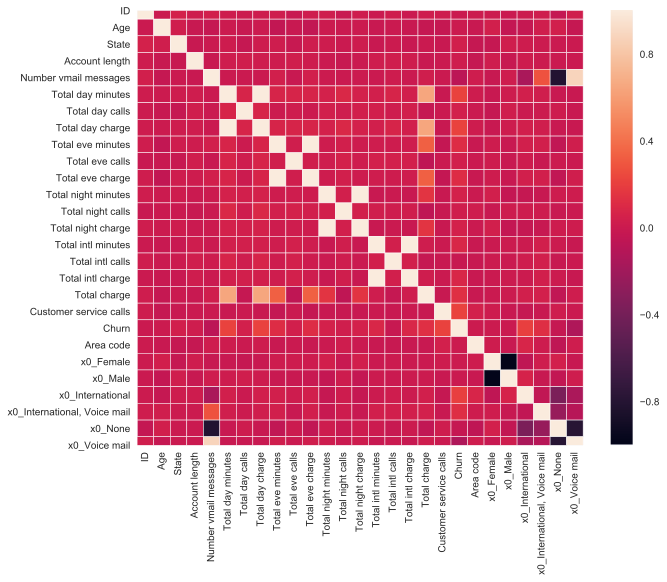

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('seaborn')

%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

import warnings
warnings.simplefilter('ignore')
 
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=False, fmt=".2f", linewidths=.5)

Признаки Number vmail messages и x0_None хорошо коррелируют - если у абонента есть какой-то план (International, Plans или оба), то число голосовых сообщений выше, поэтому удалим признак Number vmail messages.

In [241]:
data.drop(['Number vmail messages'], axis=1, inplace=True)

Признаки Total day charge и Total day minutes, Total eve charge и Total eve minutes, Total night charge и Total night minutes, Total intl charge и Total intl minutes попарно кореллируют, поэтому можно удалить Total day charge, Total eve charge, Total night charge и Total intl charge (а если нам понадобится, то мы уже вычисляли стоимость одной минуты).

In [242]:
data.drop(['Total day charge'], axis=1, inplace=True)
data.drop(['Total eve charge'], axis=1, inplace=True)
data.drop(['Total night charge'], axis=1, inplace=True)
data.drop(['Total intl charge'], axis=1, inplace=True)

Логично, что признаки x0_Male и x0_Female сильно коррелируют в противоположном смысле, поэтому оставим признак x0_Male и переименуем его.

In [243]:
data.drop(['x0_Female'], axis=1, inplace=True)

In [244]:
data['is_Male'] = data['x0_Male']

In [245]:
data.drop(['x0_Male'], axis=1, inplace=True)

### Задание 9  
  
Проведите анализ зависимости признаков.  
Для числовых признаков вычислите корреляции друг с другом и с целевой переменной `Churn`. Постройте heatmap.  
Для категориальных признаков оцените их связь с целевой переменной, постройте графики.  
  
Сделайте выводы по результатм анализа. Можно ли избавиться от некоторых признаков? Если да, то от каких и почему?

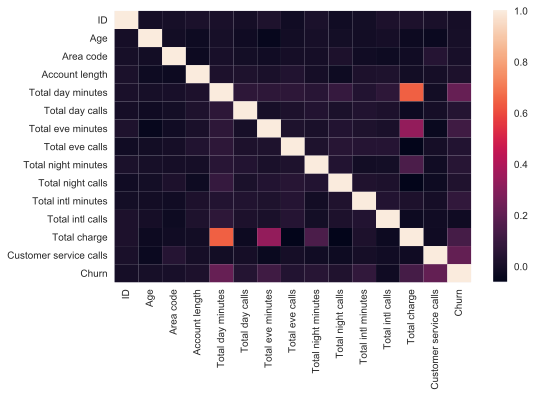

In [246]:
corr_mat = data[['ID', 'Age', 'Area code', 'Account length', 'Total day minutes', 'Total day calls', 'Total eve minutes', 
                 'Total eve calls', 'Total night minutes', 'Total night calls', 'Total intl minutes', 'Total intl calls', 
                 'Total charge', 'Customer service calls', 'Churn']].corr()

sns.heatmap(corr_mat, annot=False)
plt.ylim((corr_mat.shape[0], 0))
plt.show()

Видим, что у Total charge есть небольшая корреляция с Total day minutes, меньше с Total eve minutes и еще меньше с Total night minutes, но это связано с тем, что люди чаще звонят днем, реже вечером и еще реже ночью, поэтому убирать эти признаки не будем. Больше никаких зависимостей между признаками проследить не удается, поэтому посмотрим отдельно зависимость каждого с признаком Churn. Признак ID вообще ни на что не влияет, так как он уникален для каждого человека, поэтому удалим его.

In [247]:
data.drop(['ID'], axis=1, inplace=True)

Посмотрим отдельно на корреляцию некоторых числовых признаков с целевой переменной

In [248]:
for i in data['Area code'].unique():
    print('Доля тех, кто уйдет из зоны', i, ': ', round(data[(data['Area code'] == i) & (data['Churn'] == 1)]['Area code'].count() * 100 / data[data['Area code'] == i]['Area code'].count(), 0), '%')

Доля тех, кто уйдет из зоны 415 :  14.0 %
Доля тех, кто уйдет из зоны 408 :  16.0 %
Доля тех, кто уйдет из зоны 510 :  15.0 %


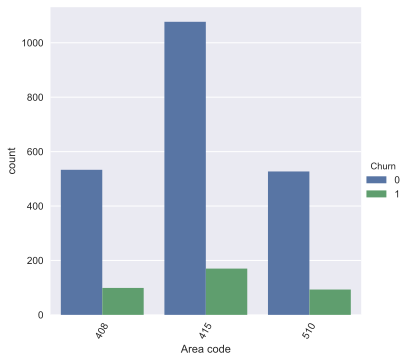

In [249]:
sns.factorplot(x='Area code', hue='Churn', data=data, kind='count', size = 5).set_xticklabels(rotation=60)

Как мы видим, по зонам покрытия процент отказавшихся от услуг практически одинаковый. Можем удалить этот признак.

In [250]:
data.drop(['Area code'], axis=1, inplace=True)

In [251]:
rang = data['Customer service calls'].unique()
rang.sort()
for i in rang:
    print('Доля тех, кто уйдет, если звонков в поддержку было', i, ': ', round(data[(data['Customer service calls'] == i) & (data['Churn'] == 1)]['Customer service calls'].count() * 100 / data[data['Customer service calls'] == i]['Customer service calls'].count(), 0), '%')

Доля тех, кто уйдет, если звонков в поддержку было 0 :  14.0 %
Доля тех, кто уйдет, если звонков в поддержку было 1 :  11.0 %
Доля тех, кто уйдет, если звонков в поддержку было 2 :  10.0 %
Доля тех, кто уйдет, если звонков в поддержку было 3 :  9.0 %
Доля тех, кто уйдет, если звонков в поддержку было 4 :  48.0 %
Доля тех, кто уйдет, если звонков в поддержку было 5 :  57.0 %
Доля тех, кто уйдет, если звонков в поддержку было 6 :  74.0 %
Доля тех, кто уйдет, если звонков в поддержку было 7 :  80.0 %
Доля тех, кто уйдет, если звонков в поддержку было 8 :  0.0 %
Доля тех, кто уйдет, если звонков в поддержку было 9 :  100.0 %


Видно, что чем больше звонков было в поддержку, тем больше людей уходило. Оставим этот признак

In [252]:
rang = data['Account length'].unique()
rang.sort()
for i in rang:
    print('Доля тех, кто уйдет, если абонент был с компанией', i, 'месяцев: ', round(data[(data['Account length'] == i) & (data['Churn'] == 1)]['Account length'].count() * 100 / data[data['Account length'] == i]['Account length'].count(), 0), '%')

Доля тех, кто уйдет, если абонент был с компанией 1 месяцев:  17.0 %
Доля тех, кто уйдет, если абонент был с компанией 3 месяцев:  0.0 %
Доля тех, кто уйдет, если абонент был с компанией 5 месяцев:  0.0 %
Доля тех, кто уйдет, если абонент был с компанией 6 месяцев:  0.0 %
Доля тех, кто уйдет, если абонент был с компанией 7 месяцев:  0.0 %
Доля тех, кто уйдет, если абонент был с компанией 8 месяцев:  0.0 %
Доля тех, кто уйдет, если абонент был с компанией 9 месяцев:  0.0 %
Доля тех, кто уйдет, если абонент был с компанией 10 месяцев:  0.0 %
Доля тех, кто уйдет, если абонент был с компанией 11 месяцев:  0.0 %
Доля тех, кто уйдет, если абонент был с компанией 12 месяцев:  33.0 %
Доля тех, кто уйдет, если абонент был с компанией 13 месяцев:  17.0 %
Доля тех, кто уйдет, если абонент был с компанией 15 месяцев:  0.0 %
Доля тех, кто уйдет, если абонент был с компанией 16 месяцев:  20.0 %
Доля тех, кто уйдет, если абонент был с компанией 17 месяцев:  33.0 %
Доля тех, кто уйдет, если абонент бы

Доля тех, кто уйдет, если абонент был с компанией 123 месяцев:  12.0 %
Доля тех, кто уйдет, если абонент был с компанией 124 месяцев:  10.0 %
Доля тех, кто уйдет, если абонент был с компанией 125 месяцев:  26.0 %
Доля тех, кто уйдет, если абонент был с компанией 126 месяцев:  29.0 %
Доля тех, кто уйдет, если абонент был с компанией 127 месяцев:  18.0 %
Доля тех, кто уйдет, если абонент был с компанией 128 месяцев:  15.0 %
Доля тех, кто уйдет, если абонент был с компанией 129 месяцев:  5.0 %
Доля тех, кто уйдет, если абонент был с компанией 130 месяцев:  10.0 %
Доля тех, кто уйдет, если абонент был с компанией 131 месяцев:  16.0 %
Доля тех, кто уйдет, если абонент был с компанией 132 месяцев:  19.0 %
Доля тех, кто уйдет, если абонент был с компанией 133 месяцев:  33.0 %
Доля тех, кто уйдет, если абонент был с компанией 134 месяцев:  8.0 %
Доля тех, кто уйдет, если абонент был с компанией 135 месяцев:  15.0 %
Доля тех, кто уйдет, если абонент был с компанией 136 месяцев:  15.0 %
Доля тех

Между признаком Account length и целевой переменной не видно вообще никакой зависимости - кто-то может продолжать обслуживаться какой-то компанией долгое время, а потом решить уйти, а кто-то сразу уходит. Это может быть связано с тем, что компания развивается, кому-то перемены нравятся, а кому-то нет. И на основе таких данных нельзя предсказать, кто уйдет следующим. Удалим этот признак.

In [253]:
data.drop(['Account length'], axis=1, inplace=True)

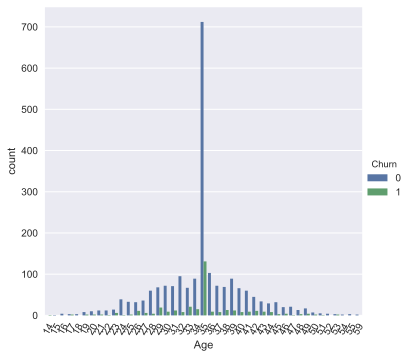

In [254]:
sns.factorplot(x='Age', hue='Churn', data=data, kind='count', size = 5).set_xticklabels(rotation=60)

In [255]:
rang = data['Age'].unique()
rang.sort()
for i in rang:
    print('Доля тех, кто уйдет с возрастом ', i, ': ', round(data[(data['Age'] == i) & (data['Churn'] == 1)]['Age'].count() * 100 / data[data['Age'] == i]['Age'].count(), 0), '%')

Доля тех, кто уйдет с возрастом  14 :  100.0 %
Доля тех, кто уйдет с возрастом  15 :  0.0 %
Доля тех, кто уйдет с возрастом  16 :  0.0 %
Доля тех, кто уйдет с возрастом  17 :  40.0 %
Доля тех, кто уйдет с возрастом  18 :  0.0 %
Доля тех, кто уйдет с возрастом  19 :  20.0 %
Доля тех, кто уйдет с возрастом  20 :  17.0 %
Доля тех, кто уйдет с возрастом  21 :  14.0 %
Доля тех, кто уйдет с возрастом  22 :  8.0 %
Доля тех, кто уйдет с возрастом  23 :  30.0 %
Доля тех, кто уйдет с возрастом  24 :  2.0 %
Доля тех, кто уйдет с возрастом  25 :  6.0 %
Доля тех, кто уйдет с возрастом  26 :  26.0 %
Доля тех, кто уйдет с возрастом  27 :  14.0 %
Доля тех, кто уйдет с возрастом  28 :  6.0 %
Доля тех, кто уйдет с возрастом  29 :  22.0 %
Доля тех, кто уйдет с возрастом  30 :  11.0 %
Доля тех, кто уйдет с возрастом  31 :  14.0 %
Доля тех, кто уйдет с возрастом  32 :  8.0 %
Доля тех, кто уйдет с возрастом  33 :  24.0 %
Доля тех, кто уйдет с возрастом  34 :  14.0 %
Доля тех, кто уйдет с возрастом  35 :  16

Здесь мы тоже не можем проследить четкой зависимости между возрастом и оттоком клиентов: с разницей всего в год процент тех, кто ушел, меняется. Этот признак тоже удалим.

In [256]:
data.drop(['Age'], axis=1, inplace=True)

Посмотрим на зависимость категориальных (или бывших категориальных) признаков с целевой переменной.

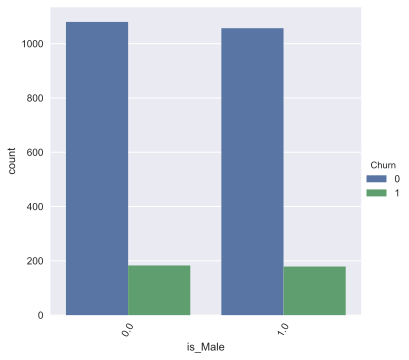

In [257]:
sns.factorplot(x='is_Male', hue='Churn', data=data, kind='count', size = 5).set_xticklabels(rotation=60)

Как мы видим из графика, распределение тех, кто ушел, по каждому полу практически одинаковое, поэтому пол не влияет на то, уйдет человек или нет. Удалим этот признак.

In [258]:
data.drop(['is_Male'], axis=1, inplace=True)

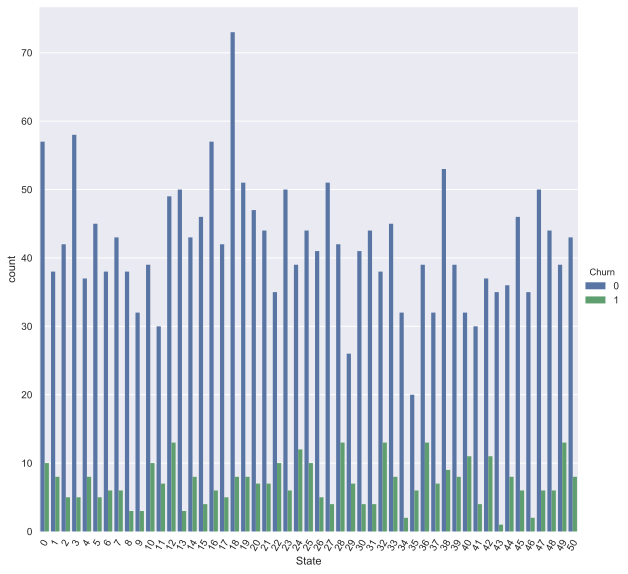

In [259]:
sns.factorplot(x='State', hue='Churn', data=data, kind='count', size = 8).set_xticklabels(rotation=60)

In [260]:
for i in data['State'].unique():
    print('Доля тех, кто уйдет из штата ', i, ': ', round(data[(data['State'] == i) & (data['Churn'] == 1)]['State'].count() * 100 / data[data['State'] == i]['State'].count(), 0), '%')

Доля тех, кто уйдет из штата  0 :  15.0 %
Доля тех, кто уйдет из штата  1 :  17.0 %
Доля тех, кто уйдет из штата  2 :  11.0 %
Доля тех, кто уйдет из штата  3 :  8.0 %
Доля тех, кто уйдет из штата  4 :  18.0 %
Доля тех, кто уйдет из штата  5 :  10.0 %
Доля тех, кто уйдет из штата  6 :  14.0 %
Доля тех, кто уйдет из штата  7 :  12.0 %
Доля тех, кто уйдет из штата  8 :  7.0 %
Доля тех, кто уйдет из штата  9 :  9.0 %
Доля тех, кто уйдет из штата  10 :  20.0 %
Доля тех, кто уйдет из штата  11 :  19.0 %
Доля тех, кто уйдет из штата  12 :  21.0 %
Доля тех, кто уйдет из штата  13 :  6.0 %
Доля тех, кто уйдет из штата  14 :  16.0 %
Доля тех, кто уйдет из штата  15 :  8.0 %
Доля тех, кто уйдет из штата  16 :  10.0 %
Доля тех, кто уйдет из штата  17 :  11.0 %
Доля тех, кто уйдет из штата  18 :  10.0 %
Доля тех, кто уйдет из штата  19 :  14.0 %
Доля тех, кто уйдет из штата  20 :  13.0 %
Доля тех, кто уйдет из штата  21 :  14.0 %
Доля тех, кто уйдет из штата  22 :  22.0 %
Доля тех, кто уйдет из шта

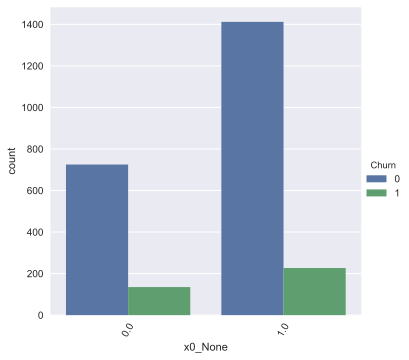

In [261]:
sns.factorplot(x='x0_None', hue='Churn', data=data, kind='count', size = 5).set_xticklabels(rotation=60)

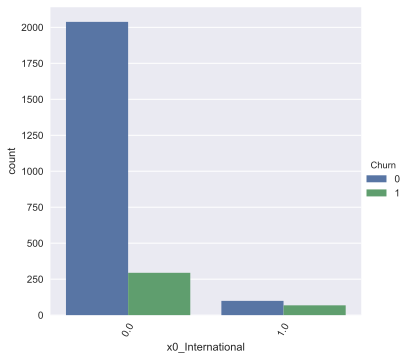

In [262]:
sns.factorplot(x='x0_International', hue='Churn', data=data, kind='count', size = 5).set_xticklabels(rotation=60)

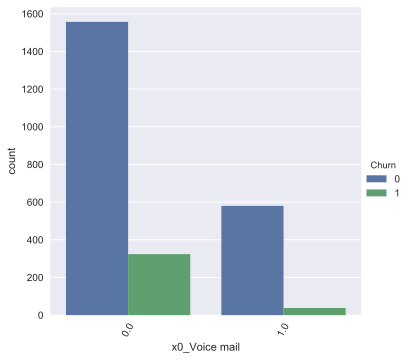

In [263]:
sns.factorplot(x='x0_Voice mail', hue='Churn', data=data, kind='count', size = 5).set_xticklabels(rotation=60)

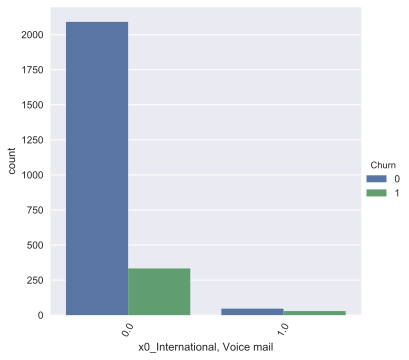

In [264]:
sns.factorplot(x='x0_International, Voice mail', hue='Churn', data=data, kind='count', size = 5).set_xticklabels(rotation=60)

In [265]:
print('Доля тех, кто уйдет из группы с тарифом None: ', round(data[(data['x0_None'] == 1.0) & (data['Churn'] == 1)]['x0_None'].count() * 100 / data[data['x0_None'] == 1.0]['x0_None'].count(), 0), '%')
print('Доля тех, кто уйдет из группы с тарифом International: ', round(data[(data['x0_International'] == 1.0) & (data['Churn'] == 1)]['x0_International'].count() * 100 / data[data['x0_International'] == 1.0]['x0_International'].count(), 0), '%')
print('Доля тех, кто уйдет из группы с тарифом Voice mail: ', round(data[(data['x0_Voice mail'] == 1.0) & (data['Churn'] == 1)]['x0_Voice mail'].count() * 100 / data[data['x0_Voice mail'] == 1.0]['x0_Voice mail'].count(), 0), '%')
print('Доля тех, кто уйдет из группы с тарифом International, Voice mail: ', round(data[(data['x0_International, Voice mail'] == 1.0) & (data['Churn'] == 1)]['x0_International, Voice mail'].count() * 100 / data[data['x0_International, Voice mail'] == 1.0]['x0_International, Voice mail'].count(), 0), '%')

Доля тех, кто уйдет из группы с тарифом None:  14.0 %
Доля тех, кто уйдет из группы с тарифом International:  41.0 %
Доля тех, кто уйдет из группы с тарифом Voice mail:  6.0 %
Доля тех, кто уйдет из группы с тарифом International, Voice mail:  39.0 %


Ищем выбросы (на всякий случай):

In [266]:
def _getAplus(A): # если матрица неположительно определена, эта функция (nearPD) вычислит максимально приближенную положительно 
    eigval, eigvec = np.linalg.eig(A) # определенную матрицу для данной матрицы
    Q = np.matrix(eigvec)
    xdiag = np.matrix(np.diag(np.maximum(eigval, 0)))
    return Q*xdiag*Q.T

def _getPs(A, W=None):
    W05 = np.matrix(W**.5)
    return  W05.I * _getAplus(W05 * A * W05) * W05.I

def _getPu(A, W=None):
    Aret = np.array(A.copy())
    Aret[W > 0] = np.array(W)[W > 0]
    return np.matrix(Aret)

def nearPD(A, nit=10):
    n = A.shape[0]
    W = np.identity(n) 
    deltaS = 0
    Yk = A.copy()
    for k in range(nit):
        Rk = Yk - deltaS
        Xk = _getPs(Rk, W=W)
        deltaS = Xk - Rk
        Yk = _getPu(Xk, W=W)
    return Yk

In [267]:
def MahalanobisDist(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix) is False:
        covariance_matrix = nearPD(covariance_matrix)
        
    inv_covariance_matrix = np.linalg.inv(covariance_matrix) #инверсная матрица ковараиции
    if is_pos_def(inv_covariance_matrix) is False:
        inv_covariance_matrix = nearPD(inv_covariance_matrix)

    vars_mean = [] #ищем среднее значение переменных для каждого объекта и сохраняем в массиве
    for i in range(data.shape[0]):
        vars_mean.append(list(data.mean(axis=0)))
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i]))) 
        
    if verbose:
        return md 

In [268]:
def MD_detectOutliers(data, extreme=False, verbose=False): #вычисляем выбросы
    MD = MahalanobisDist(data, verbose)
    std = np.std(MD)
    k = 3. * std if extreme else 2. * std #правило 68-95-99.7
    m = np.mean(MD)
    up_t = m + k
    low_t = m - k
    outliers = []
    for i in range(len(MD)):
        if (MD[i] >= up_t) or (MD[i] <= low_t):
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

In [269]:
def is_pos_def(A): #проверим, является ли матрица ковариации и ее обратное симметричным и положительно определенным
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

In [270]:
new = np.array(data)

outliers_indices = MD_detectOutliers(new, verbose=True)

print("Outliers Indices: {}\n".format(outliers_indices))
print("Outliers:")
for ii in outliers_indices:
    print(new[ii])

Outliers Indices: []

Outliers:


Выбросов нет.

### Задание 10  
  
Рассмотрим основанную на правилах модель для предсказания оттока клиентов: 
* Если у пользователя подключен роуминг (International plan) & клиент звонил в тех. поддержку более 3-х раз => клиент уйдет (Churn = True)
* Иначе => клиент останется (Churn = False)  
  
  
Оцените качество данной модели на 5-fold валидации из 5 повторений. Для оценки качества рассмотрите различные метрики: F1-score, precision, recall, accuracy, balanced accuracy. Дайте комментарий к оценке.

In [271]:
data.loc[(((data['x0_International'] == 1.0) | (data['x0_International, Voice mail'] == 1.0)) & 
          (data['Customer service calls'] >= 3)), 'Churn_2'] = 1
data['Churn_2'].fillna(0, inplace=True)

data['Churn_2'] = data['Churn_2'].astype('int64')

from sklearn import metrics

f1 = metrics.f1_score(y_pred=data['Churn_2'], y_true=data['Churn'])
prec = metrics.precision_score(y_pred=data['Churn_2'], y_true=data['Churn'])
rec = metrics.recall_score(y_pred=data['Churn_2'], y_true=data['Churn'])
acc = metrics.accuracy_score(y_pred=data['Churn_2'], y_true=data['Churn'])
bal_acc = metrics.balanced_accuracy_score(y_pred=data['Churn_2'], y_true=data['Churn'])

print('F1: ', f1)
print('Precision: ', prec)
print('Recall: ', rec)
print('Accuracy: ', acc)
print('Balanced accuracy: ', bal_acc)
data.drop(['Churn_2'], axis=1, inplace=True)

F1:  0.10243902439024388
Precision:  0.4375
Recall:  0.058011049723756904
Accuracy:  0.8527410964385754
Balanced accuracy:  0.5226882576648733


Видно, что доля правильных ответов этой модели достаточно высока (accuracy примерно 85%). Precision (доля объектов, которые были предсказаны в класс 1 и при этом действительно принадлежат этому классу) составляет практически 44%, в отличие от recall, показывающий долю объектов действительно из класса 1, который нашел алгоритм из всех объектов класса 1. Среднее гармоническое precision и recall, то есть F1-score, достаточно низкий (10%).

In [272]:
data.head()

,State,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Total charge,Customer service calls,Churn,x0_International,"x0_International, Voice mail",x0_None,x0_Voice mail
0,0,174.4,75.0,169.9,80.0,201.6,130.0,11.0,4.0,5613.0,1,0,0.0,0.0,0.0,1.0
1,1,185.8,119.0,192.3,83.0,200.0,96.0,6.6,4.0,5872.0,1,0,0.0,0.0,1.0,0.0
2,2,224.9,105.0,250.0,101.0,216.1,73.0,6.7,5.0,7101.0,3,1,0.0,0.0,1.0,0.0
3,3,128.2,87.0,133.2,105.0,177.6,123.0,11.2,2.0,4412.0,1,0,0.0,0.0,1.0,0.0
4,4,157.1,134.0,184.9,122.0,197.2,59.0,8.5,5.0,5360.0,4,1,0.0,0.0,1.0,0.0


## Часть 2. Методы машинного обучения <a id="part2"></a>

*Вес в общей оценке - 0.5*

Продолжаем работать с данными по оттоку клиентов.  
Сформулируем задачу машинного обучения: необходимо построить модель, определяющую, останется клиент или уйдет. 
  
Для решения заданий, представленных ниже, необходимо использовать данные, полученные после выполнения всех преобразований в первой части. 

### Задание 1  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.  
* Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.  
* Сравните между собой деревья решений, полученных на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 

In [273]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import graphviz
from sklearn.tree import export_graphviz

In [274]:
X = data.drop('Churn', axis=1)
y = data['Churn']
skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)

In [275]:
dtree_model = DecisionTreeClassifier(max_depth=5)

In [276]:
splits = [(i, j) for (i,j) in skf.split(X, y)]

Accuracy: 0.96208 
Balanced accuracy: 0.89259
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       428
           1       0.94      0.79      0.86        73

    accuracy                           0.96       501
   macro avg       0.95      0.89      0.92       501
weighted avg       0.96      0.96      0.96       501

Accuracy: 0.9481 
Balanced accuracy: 0.8276
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       428
           1       0.98      0.66      0.79        73

    accuracy                           0.95       501
   macro avg       0.96      0.83      0.88       501
weighted avg       0.95      0.95      0.94       501

Accuracy: 0.95391 
Balanced accuracy: 0.85182
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       427
           1       0.96      0.71      0.82        72

    accuracy                           0.95   

Accuracy: 0.94389 
Balanced accuracy: 0.8171
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       427
           1       0.96      0.64      0.77        72

    accuracy                           0.94       499
   macro avg       0.95      0.82      0.87       499
weighted avg       0.94      0.94      0.94       499

Accuracy: 0.96794 
Balanced accuracy: 0.89466
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       427
           1       0.98      0.79      0.88        72

    accuracy                           0.97       499
   macro avg       0.97      0.89      0.93       499
weighted avg       0.97      0.97      0.97       499



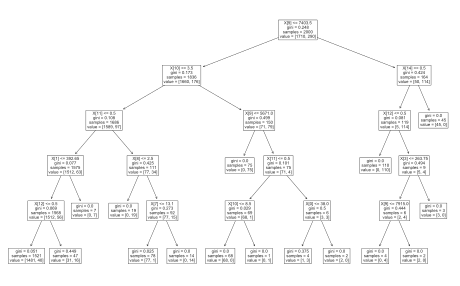

In [277]:
for train_index, test_index in splits:
    dtree_model.fit(X.iloc[train_index], y.iloc[train_index]) 
    preds = dtree_model.predict(X.iloc[test_index])
    print("Accuracy:",
      round(metrics.accuracy_score(y.iloc[test_index], preds), 5),
     '\nBalanced accuracy:',
     round(metrics.balanced_accuracy_score(y.iloc[test_index], preds), 5))
    print(metrics.classification_report(y.iloc[test_index], preds))
    plot_tree(dtree_model)

У меня почему-то не хочет выводить рисунки деревьев (так было еще в лабе на 2м курсе, я спрашивала у преподавателя, и мы не смогли решить эту проблему), поэтому я сравню последнее дерево в верхних итерациях с последним деревом в нижних.

In [110]:
skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)
splits = [(i, j) for (i,j) in skf.split(X, y)]

Accuracy: 0.95808
Accuracy: 0.95808
Accuracy: 0.9519
Accuracy: 0.97194
Accuracy: 0.96192


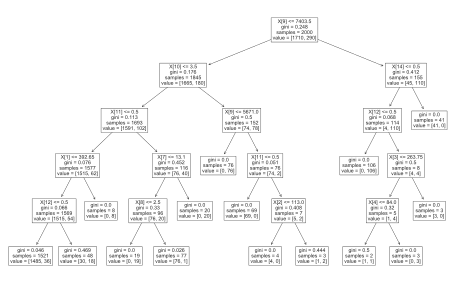

In [111]:
for train_index, test_index in splits:
    dtree_model = DecisionTreeClassifier(max_depth=5)
    dtree_model.fit(X.iloc[train_index], y.iloc[train_index])
    preds = dtree_model.predict(X.iloc[test_index])
    print("Accuracy:", round(metrics.accuracy_score(y.iloc[test_index], preds), 5))
    plot_tree(dtree_model)

В целом, оценка accuracy близка к 1 на каждом разбиении, что говорит о том, что модель достаточно хорошо предсказывает, уйдет клиент или нет. Модель разбивает по похожим вопросам даже при разном количестве повторений. Так как оценки на каждом дереве очень схожи, можем предположить, что и сами они по построению не сильно отличаются

В описании работы дерева будем идти по веткам True.

Сначала мы смотрим на Total charge: если не больше 7403.5, то переходим к признаку Customer service calls. Если звонков было 3 и меньше, то идем дальше по ветке True и смотрим на x0_International (если этот тариф не подключен, то идем дальше). Дальше выбираем по количеству минут, проговоренных днем: выбираем тех клиентов, кто говорил не более 392ю65 минут, а потом смотрим на тариф x0_International, Voice mail - если не подключен, то клиент останется.

### Задание 2  
  
На кросс-валидации (5-fold из 5 повторений) оцените, как меняется качество модели Random Forest с ростом числа деревьев (при дефолтных значениях остальных параметров). Провизуализируйте результаты. Сколько деревьев достаточно в данном случае и почему?  
**NB:** В сравнение включите конфигурацию, аналогичную простому дереву решений. 

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [113]:
skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
splits = [(i, j) for (i,j) in skf.split(X, y)]

In [114]:
scores_acc = []
scores_rec = []
scores_f1 = []
scores_bacc = []
for i in range(10, 105, 5):
    model = RandomForestClassifier(n_estimators=i)
    acc = 0
    rec = 0
    f1 = 0
    bacc = 0
    for train_index, test_index in splits:
        model.fit(X.iloc[train_index], y.iloc[train_index])
        preds = model.predict(X.iloc[test_index])
        acc += metrics.accuracy_score(y.iloc[test_index], preds)
        rec += metrics.recall_score(y.iloc[test_index], preds)
        f1 += metrics.f1_score(y.iloc[test_index], preds)
        bacc += metrics.balanced_accuracy_score(y.iloc[test_index], preds)
    scores_acc.append(acc/25)
    scores_rec.append(rec/25)
    scores_f1.append(f1/25)
    scores_bacc.append(bacc/25)

In [115]:
num = [i for i in range(10, 105, 5)]

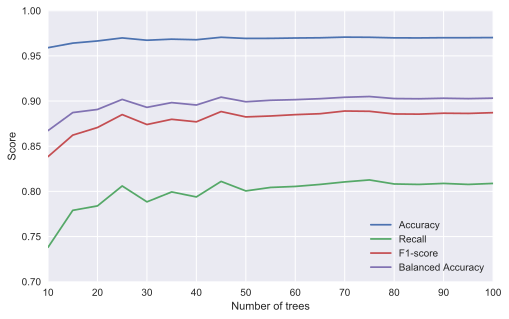

In [116]:
plt.axis([10, 100, 0.7, 1])
plt.xlabel('Number of trees')
plt.ylabel('Score')
plt.plot(num, scores_acc, label='Accuracy')
plt.plot(num, scores_rec, label='Recall')
plt.plot(num, scores_f1, label='F1-score')
plt.plot(num, scores_bacc, label='Balanced Accuracy')
plt.legend()
plt.show()

Видим из графика, что после 25-35 точность начинает незначительно изменятся (для Accuracy, Balanced Accuracy и F1-score). Так, если смотреть на разницу оценки при числе деревьев, равному 25-35 и 95, оценка увеличивается на сотые. Разница в качестве небольшая, но вычислительная сложность увеличивается в разы. Поэтому остановимся на числе деревьев 25-35, так как если брать больше, то качество слегка улучшится, а вот сложность сильно повысится.

### Задание 3  
  
* Настройте гиперпараметры модели Random Forest на 5-fold валдиации из 5 повторений. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.
* Разделите данные на обучающую и тестовую выборки в пропорциях 70:30 (сохраните seed). Обучите Random Forest  с настроенными параметрами на обучающей выборке. На тестовой выборке оцените качество (F1-score) всего ансамбля и <u>каждого дерева отдельно</u>. Постройте график распределения качества деревьев в ансамбле и сравните результаты с качеством всего леса. Дайте комментарий.  
* Выведите важность признаков в Random Forest, сделайте выводы. 

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time

(trainData, testData, train_label, test_label) = train_test_split(data.drop('Churn', axis=1), data['Churn'], test_size=0.3,
                                                                  random_state=5)

rf = RandomForestClassifier()

param_grid = {'n_estimators': [i for i in range(1, 41, 5)], 'max_features' : ["auto", "sqrt", "log2"], 
              'max_depth': [i for i in range(1, 20)], 'min_samples_split' : [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

start = time.time()
cv_rs = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, random_state=42, 
                           scoring='f1', n_jobs=-1)
cv_rs.fit(trainData, train_label) 
end=time.time()

print(end-start)

30.591108083724976


In [118]:
print(cv_rs.best_params_)

{'n_estimators': 31, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 16}


In [119]:
rf = RandomForestClassifier(n_estimators=cv_rs.best_params_.get("n_estimators"), 
                               min_samples_split=cv_rs.best_params_.get("min_samples_split"), 
                               min_samples_leaf=cv_rs.best_params_.get("min_samples_leaf"), 
                               max_features=cv_rs.best_params_.get("max_features"), 
                               max_depth=cv_rs.best_params_.get("max_depth"))
rf.fit(trainData, train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=31,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [120]:
predicted = rf.predict(testData)

In [121]:
print('F1-Score:', metrics.f1_score(test_label, predicted)) #оценка для ансамбля

F1-Score: 0.8611111111111112


In [122]:
f1 = metrics.f1_score(test_label, predicted)

In [123]:
f1_sc = []
for i in range(len(rf.estimators_)):
    rf.estimators_[i].fit(trainData, train_label)
    predicted = rf.estimators_[i].predict(testData)
    print('F1-Score', i + 1, ':', metrics.f1_score(test_label, predicted)) #отдельно для каждого дерева
    f1_sc.append(metrics.f1_score(test_label, predicted))

F1-Score 1 : 0.594059405940594
F1-Score 2 : 0.8034188034188033
F1-Score 3 : 0.8333333333333334
F1-Score 4 : 0.7659574468085106
F1-Score 5 : 0.7720930232558141
F1-Score 6 : 0.7174887892376682
F1-Score 7 : 0.7634854771784233
F1-Score 8 : 0.8506787330316741
F1-Score 9 : 0.6197183098591549
F1-Score 10 : 0.6991150442477877
F1-Score 11 : 0.7280701754385964
F1-Score 12 : 0.7420814479638008
F1-Score 13 : 0.6912442396313365
F1-Score 14 : 0.6756756756756757
F1-Score 15 : 0.7894736842105263
F1-Score 16 : 0.7188940092165897
F1-Score 17 : 0.7627118644067796
F1-Score 18 : 0.7705627705627704
F1-Score 19 : 0.7249999999999999
F1-Score 20 : 0.7489361702127659
F1-Score 21 : 0.8230088495575221
F1-Score 22 : 0.7207207207207208
F1-Score 23 : 0.7866108786610878
F1-Score 24 : 0.7214611872146119
F1-Score 25 : 0.763157894736842
F1-Score 26 : 0.6859903381642513
F1-Score 27 : 0.704225352112676
F1-Score 28 : 0.7168141592920353
F1-Score 29 : 0.7522123893805311
F1-Score 30 : 0.7264573991031389
F1-Score 31 : 0.690265

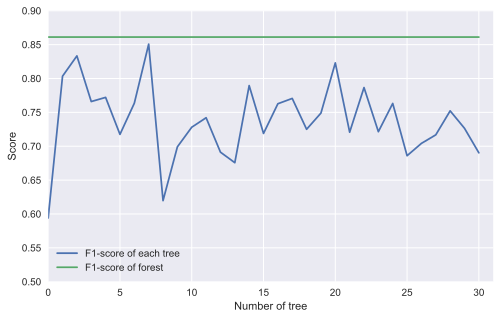

In [124]:
plt.axis([0, len(rf.estimators_), 0.5, 0.9])
plt.xlabel('Number of tree')
plt.ylabel('Score')
plt.plot([i for i in range(len(rf.estimators_))], f1_sc, label='F1-score of each tree')
plt.plot([i for i in range(len(rf.estimators_))], [f1 for i in range(len(rf.estimators_))], label='F1-score of forest')
plt.legend()
plt.show()

Как видно из графика, качество всего леса лучше, чем качество каждого дерева по отдельности. Это связи с тем, что после построения каждого дерева происходит "голосование", и в итоге каждому наблюдению предсказывают тот класс, который чаще всего ей предсказался.

Feature: 0, Score: 0.01930
Feature: 1, Score: 0.11196
Feature: 2, Score: 0.02514
Feature: 3, Score: 0.03163
Feature: 4, Score: 0.02634
Feature: 5, Score: 0.03050
Feature: 6, Score: 0.02487
Feature: 7, Score: 0.05321
Feature: 8, Score: 0.04680
Feature: 9, Score: 0.31736
Feature: 10, Score: 0.16272
Feature: 11, Score: 0.03961
Feature: 12, Score: 0.01790
Feature: 13, Score: 0.03870
Feature: 14, Score: 0.05396


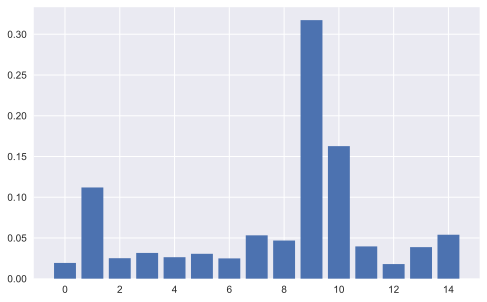

In [125]:
importance = rf.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

Важнее всего признаки: Total day minutes, Customer service calls, Total charge. ПЕСли рассуждать логично, то важность признаков распределена не идеально, учитывая, что самым важным должен быть признак x0_International.

### Задание 4  
  
* Используйте логистическую регрессию для решения задачи, подберите оптимальные значения гипермараметров. Оцените качество (roc auc) на 5-fold валидации из 5 повторений. 
* Аналогично (на такой же валидации (тех же подвыборках) с такой же метрикой) оцените качество Random Forest  с подобранными в предыдущем задании параметрами. Сравните с качеством логистическом регрессии.
* Разделите данные на обучающую и тестовую выборки в пропорциях 70:30 (используйте тот же seed, что и в Задании 3). На обучающей выборке обучите логистическую регрессию и Random Forest  с настроенными параметрами. Для обеих моделей оцените качество на тестовой выборке - постройте ROC-кривую, вычислите roc auc.

In [126]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
 
lgr = LogisticRegression()

In [127]:
param_grid = {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
 
start = time.time()
cv_rs = RandomizedSearchCV(estimator=lgr, param_distributions=param_grid, n_iter=100, cv=5, random_state=42, scoring='f1', 
                           n_jobs=-1)
cv_rs.fit(trainData, train_label)
end=time.time()
print(end-start)
 
print(cv_rs.best_params_)

26.182172298431396
{'solver': 'newton-cg', 'C': 1.0}


In [128]:
lgr = LogisticRegression(penalty="l2", solver=cv_rs.best_params_.get('solver'), C=cv_rs.best_params_.get("C"))

In [129]:
skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
splits = [(i, j) for (i,j) in skf.split(X, y)]

cs_lgr = []
cs_rf = []
f1_lgr = []
f1_rf = []
for train_index, test_index in splits:
    lgr.fit(X.iloc[train_index], y.iloc[train_index])
    rf.fit(X.iloc[train_index], y.iloc[train_index])
    preds_1 = lgr.predict(X.iloc[test_index])
    preds_2 = rf.predict(X.iloc[test_index])
    cs_lgr.append(metrics.roc_auc_score(y.iloc[test_index], preds_1))
    cs_rf.append(metrics.roc_auc_score(y.iloc[test_index], preds_2))
    f1_lgr.append(metrics.f1_score(y.iloc[test_index], preds_1))
    f1_rf.append(metrics.f1_score(y.iloc[test_index], preds_2))

In [130]:
print('AUC Random Forest:', np.mean(cs_rf))
print('F1 Random Forest:', np.mean(f1_rf))

AUC Random Forest: 0.8997729175242865
F1 Random Forest: 0.8819371060328737


In [131]:
print('AUC Logistic Regression:', np.mean(cs_lgr))
print('F1 Logistic Regression:', np.mean(f1_lgr))

AUC Logistic Regression: 0.5839118985005932
F1 Logistic Regression: 0.28602700377060297


In [132]:
lgr.fit(trainData, train_label)
preds = lgr.predict(testData)

In [133]:
fpr, tpr, thresh = metrics.roc_curve(test_label, preds, pos_label=1)
roc_auc = auc(fpr, tpr)

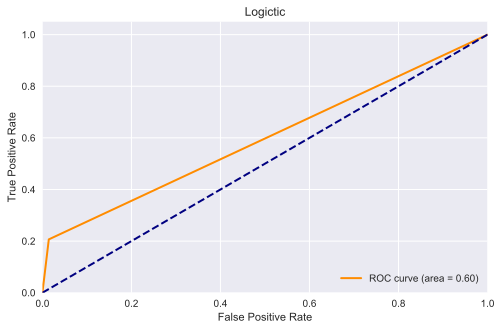

In [134]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logictic')
plt.legend(loc="lower right")
plt.show()

In [135]:
rf.fit(trainData, train_label)
pred = rf.predict(testData)

In [136]:
fpr, tpr, thresh = metrics.roc_curve(test_label, pred, pos_label=1)
roc_auc = auc(fpr, tpr)

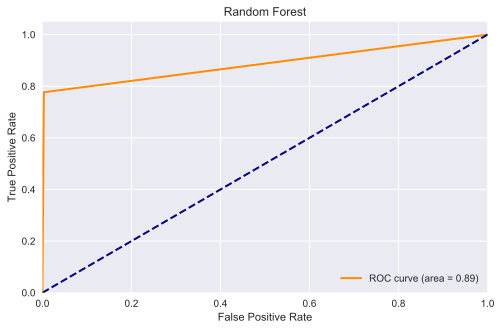

In [137]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest')
plt.legend(loc="lower right")
plt.show()

### Задание 5

Для алгоритма AdaBoost с параметрами по умолчанию оцените на 5-fold валидации, как растет качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты.

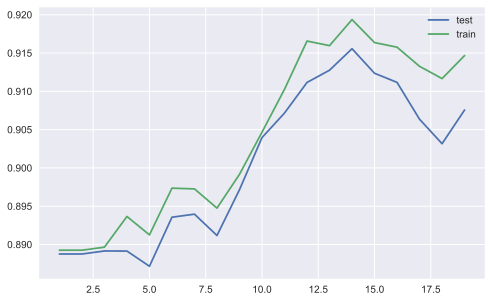

In [138]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

mass = [i for i in range(1, 20)]

accuracies = []
accuracies_train = []

skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)
splits = [(i, j) for (i,j) in skf.split(X, y)]

for n_est in mass:
    clf = AdaBoostClassifier(n_estimators=n_est)
    acc = []
    acc_train = []
    for train_index, test_index in splits:
        clf.fit(X.iloc[train_index], y.iloc[train_index])
        preds = clf.predict(X.iloc[test_index])
        preds_train = clf.predict(X.iloc[train_index])
        acc.append(metrics.accuracy_score(y.iloc[test_index], preds))
        acc_train.append(metrics.accuracy_score(y.iloc[train_index], preds_train))
    accuracies.append(np.mean(acc))
    accuracies_train.append(np.mean(acc_train))
    
plt.plot(mass, accuracies, label='test')
plt.plot(mass, accuracies_train, label='train')
plt.legend()
plt.show()

### Задание 6

* Настройте гиперпараметры AdaBoost на 5-fold валидации, используя в качестве базовых классификаторов дерево решений и SVM. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.
* Выведите наилучшую конфигурацию параметров для каждого базового классификатора. Сравните качество.

In [139]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [140]:
param_grid = {'algorithm' : ['SAMME', 'SAMME.R'], 'learning_rate': np.arange(0.05, 0.31, 0.05), 'n_estimators': [100]}

In [141]:
ada = AdaBoostClassifier(SVC(probability=True, kernel='linear', max_iter=1500, tol=0.01)) 
#пришлось ограничить число итераций, толеранс и еще число ядер, иначе ждать придется больше 1,5 часов

In [142]:
start = time.time()
cv_rs = RandomizedSearchCV(estimator=ada, param_distributions=param_grid, cv=5, scoring='f1', n_jobs=2)
cv_rs.fit(trainData, train_label)
end=time.time()

print(end-start)

540.7643110752106


In [143]:
print(cv_rs.best_params_)

{'n_estimators': 100, 'learning_rate': 0.1, 'algorithm': 'SAMME'}


In [144]:
ada = AdaBoostClassifier(SVC(probability=True, kernel='linear', max_iter=1500, tol=0.01), 
                         learning_rate=cv_rs.best_params_.get("learning_rate"), 
                         n_estimators=cv_rs.best_params_.get("n_estimators"), algorithm=cv_rs.best_params_.get("algorithm"))
ada.fit(trainData, train_label)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                      coef0=0.0, decision_function_shape='ovr',
                                      degree=3, gamma='auto_deprecated',
                                      kernel='linear', max_iter=1500,
                                      probability=True, random_state=None,
                                      shrinking=True, tol=0.01, verbose=False),
                   learning_rate=0.1, n_estimators=100, random_state=None)

In [145]:
preds = ada.predict(testData)
print('F1-Score:', metrics.f1_score(test_label, preds), 'Accuracy: ', metrics.accuracy_score(test_label, preds))

F1-Score: 0.2821576763485477 Accuracy:  0.5386666666666666


In [146]:
param_grid = {'learning_rate': np.arange(0.05, 0.31, 0.05), 'n_estimators': [100], 'algorithm': ['SAMME', 'SAMME.R']}

ada = AdaBoostClassifier()

start = time.time()
cv_rs = RandomizedSearchCV(estimator=ada, param_distributions=param_grid, cv=5, scoring='f1', n_jobs=-1)
cv_rs.fit(trainData, train_label)
end=time.time()

print(end-start)

9.824546337127686


In [147]:
print(cv_rs.best_params_)

{'n_estimators': 100, 'learning_rate': 0.25, 'algorithm': 'SAMME.R'}


In [148]:
ada = AdaBoostClassifier(learning_rate=cv_rs.best_params_.get("learning_rate"), 
                         n_estimators=cv_rs.best_params_.get("n_estimators"), algorithm=cv_rs.best_params_.get("algorithm"))
ada.fit(trainData, train_label)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.25,
                   n_estimators=100, random_state=None)

In [149]:
preds = ada.predict(testData)
print('F1-Score:', metrics.f1_score(test_label, preds), 'Accuracy: ', metrics.accuracy_score(test_label, preds))

F1-Score: 0.5668449197860963 Accuracy:  0.892


### Задание 7  
  
* Используйте для решения задачи один из фреймворков градиентного бустинга: XGBoost, LightGDB или CatBoost.  
* Оцените на 5-fold валидации, как растет качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты.  
* Настройте гиперпараметры модели на 5-fold валидации, в качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.  
* Разделите данные на обучающую и тестовую выборки в пропорциях 70:30 (используйте тот же seed, что и в Задании 3). Обучите модель с настроенными параметрами на обучающей выборке. На тестовой выборке оцените качество. Сравните с предыдущими моделями, дайте комментарий.  
* Оцените важность признаков в обученной модели с оптимальными параметрами. 

In [150]:
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [151]:
xgb_score = []
mass = [i for i in range(1, 20)]

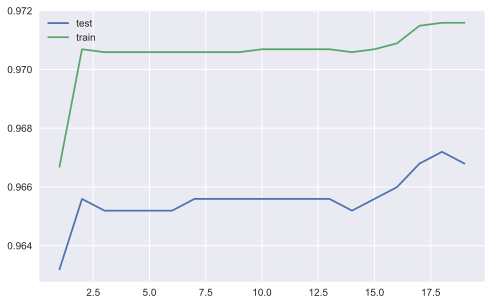

In [152]:
acc = []
acc_train = []

skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)
splits = [(i, j) for (i,j) in skf.split(X, y)]

for n_est in mass:
    clf = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=n_est, min_child_weight=3)
    xgb_score = []
    xgb_score_train = []
    for train_index, test_index in splits:
        clf.fit(X.iloc[train_index], y.iloc[train_index])
        preds = clf.predict(X.iloc[test_index])
        preds_train = clf.predict(X.iloc[train_index])
        xgb_score.append(metrics.accuracy_score(y.iloc[test_index], preds))
        xgb_score_train.append(metrics.accuracy_score(y.iloc[train_index], preds_train))
    acc.append(np.mean(xgb_score))
    acc_train.append(np.mean(xgb_score_train))
    
plt.plot(mass, acc, label='test')
plt.plot(mass, acc_train, label='train')
plt.legend()
plt.show()

In [153]:
param_grid = {'learning_rate': np.arange(0.05, 0.31, 0.05), 'max_depth': np.arange(5, 16, 1, dtype=int),
              'min_child_weight': np.arange(1, 8, 1, dtype=int), 'colsample_bytree': np.arange(0.3, 0.8, 0.1),
              'subsample': [0.8, 1], 'n_estimators': [100]}
model = xgb.XGBClassifier()

In [154]:
start = time.time()
cv_rs = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, scoring='f1', n_jobs=-1)
cv_rs.fit(trainData, train_label)
end=time.time()
print(end-start)
 
print(cv_rs.best_params_)

32.84428787231445
{'subsample': 1, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 11, 'learning_rate': 0.15000000000000002, 'colsample_bytree': 0.6000000000000001}


In [155]:
model = xgb.XGBClassifier(learning_rate=cv_rs.best_params_.get("learning_rate"), max_depth=cv_rs.best_params_.get("max_depth"), 
                          n_estimators=cv_rs.best_params_.get("n_estimators"), 
                          min_child_weight=cv_rs.best_params_.get("min_child_weight"))
model.fit(trainData, train_label)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15000000000000002, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [156]:
preds = model.predict(testData)
print('F1-Score:', metrics.f1_score(test_label, preds), '\n'
      'Accuracy: ', metrics.accuracy_score(test_label, preds)) #score ensemble

F1-Score: 0.8828828828828829 
Accuracy:  0.9653333333333334


Feature: 0, Score: 0.01789
Feature: 1, Score: 0.03605
Feature: 2, Score: 0.02172
Feature: 3, Score: 0.01608
Feature: 4, Score: 0.01806
Feature: 5, Score: 0.01819
Feature: 6, Score: 0.01941
Feature: 7, Score: 0.05766
Feature: 8, Score: 0.06012
Feature: 9, Score: 0.18463
Feature: 10, Score: 0.14043
Feature: 11, Score: 0.05824
Feature: 12, Score: 0.06659
Feature: 13, Score: 0.01878
Feature: 14, Score: 0.26615


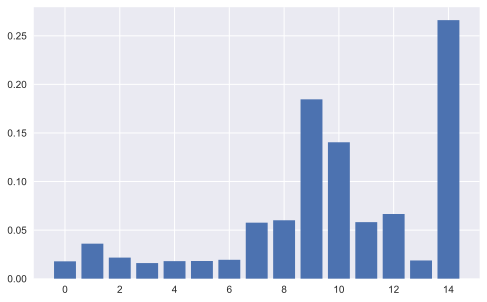

In [157]:
importance = model.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [158]:
data.head()

,State,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Total charge,Customer service calls,Churn,x0_International,"x0_International, Voice mail",x0_None,x0_Voice mail
0,0,174.4,75.0,169.9,80.0,201.6,130.0,11.0,4.0,5613.0,1,0,0.0,0.0,0.0,1.0
1,1,185.8,119.0,192.3,83.0,200.0,96.0,6.6,4.0,5872.0,1,0,0.0,0.0,1.0,0.0
2,2,224.9,105.0,250.0,101.0,216.1,73.0,6.7,5.0,7101.0,3,1,0.0,0.0,1.0,0.0
3,3,128.2,87.0,133.2,105.0,177.6,123.0,11.2,2.0,4412.0,1,0,0.0,0.0,1.0,0.0
4,4,157.1,134.0,184.9,122.0,197.2,59.0,8.5,5.0,5360.0,4,1,0.0,0.0,1.0,0.0


На тестовой выборке качество слегка снижается, возможно, модель начинает подстраиваться под трейновые данные. Но в целом оценка очень высокая, даже выше, чем у Random Forest. Возможно, это лучшая модель для наших данных.

## Часть 3. Соревнование по машинному обучению <a id="part3"></a>

*Вес в общей оценке - 0.3*

В данном задании вам предлагается принять участие в [Inclass соревновании](https://www.kaggle.com/t/b25354482b484011b3b782da84d61186) на Kaggle.  
Задача соревнования заключается в том, чтобы как можно лучше решить задачу предсказания оттока клиентов.  
  
Метрикой качества (точности) решения в данном соревновании является **ROC AUC**. 

Для участия в соревновании, т.е. для того, чтобы сабмитить результаты, вам необходимо создать аккаунт на [kaggle](https://www.kaggle.com/).

После того, как вы выполните сабмит, в leaderboard вы сможете посмотреть качество вашей модели на тестовой выборке и место в общем зачете.  
Вы можете делать много (до 10 в день) сабмитов - в leaderbord всегда отображается самый лучший (остальные можно посмотреть в `My Submissions`).

**NB:** Обратите внимание, что текущий рейтинг (до конца соревнования) строится только на части тестовых данных. После окончания соревнования рейтинг будет пересчитан на всех данных и позиции могут измениться.
Вы можете сами выбрать три модели (сабмита), которые будут провалидированы на всех данных. По умолчанию будут выбраны три модели, давшие лучший результат в текущем рейтинге.

### Задание  
  
Необходимо построить и засабмитить модель, которая:   
* Задача минимум – покажет на тестовой выборке качество выше baseline: TBD
* Задача максимум - решит задачу как можно точнее.  
  
При решении можно и нужно выполнять различные преобразования признаков и применять различные модели машинного обучения.  

В качестве результата необходимо: 
* Сказать ваш логин на kaggle, чтобы мы могли распознать вас в leaderboard. 
* Для лучшей модели:
    * Предоставить скрипт\ноутбук, выполнив который можно получить файл для сабмита (чтобы можно было воспроизвести ваш результат). Также необходимо предоставить саму сохраненную модель.  
    * Предоставить скрипт\ноутбук для преобразования данных и обучения лучшей модели. 
    * (Опционально) Предоставить ноутбук с результатами для других моделей\сабмитов, которые вы пробовали.  
  
По результатам будет составлен наш локальный leaderboard, и по нему будут определены баллы за задание. 

### Баллы за место в итоговом рейтинге  
  
* 1-5 место: 10 баллов
* 6-10 место: 9 баллов  
* 11-15 место: 8 баллов
* 16-25 место: 7 баллов  
* 26-35 место: 6 баллов
* 36-50 место: 5 баллов
* 51-65 место: 4 балла
* 66-80 место: 3 балла
* 81-... место: 2 балла  
  
**NB:** Чтобы получить баллы за соревнование, нужно превзойти baseline. В противном случае будет 0 баллов. 